# Sales Data Analysis


# Section 1: Data Cleaning and Preparation

In [80]:
#Importing the libraries I will need.
import pandas as pd #to manipulate the dataset
import numpy as np #for any statistics
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for visualisations also
%matplotlib inline

In [81]:
#Overview of the data.
df = pd.read_csv('Case_Study_Data.csv', index_col=0)
df.head(10)

,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
DATE,,,,,,
"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"
"August 18, 2024, 9:32 PM",Category-76,Product-6e9c,Business-de42,Location-1ba8,1,"2,605"
"August 18, 2024, 9:32 PM",Category-120,Product-7864,Business-de42,Location-1ba8,1,"1,940"
"August 18, 2024, 9:32 PM",Category-119,Product-7940,Business-de42,Location-1ba8,4,"1,460"
"August 18, 2024, 9:32 PM",Category-96,Product-87b2,Business-de42,Location-1ba8,1,805


In [82]:
#The data has a date index like a timeseries so let me understand the columns and data types by using info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333405 entries, August 18, 2024, 9:32 PM to October 10, 2024, 6:19 PM
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ANONYMIZED CATEGORY  333405 non-null  object
 1   ANONYMIZED PRODUCT   333405 non-null  object
 2   ANONYMIZED BUSINESS  333405 non-null  object
 3   ANONYMIZED LOCATION  333405 non-null  object
 4   QUANTITY             333405 non-null  int64 
 5   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.8+ MB


In [83]:
'''
Things to note include;
Most columns are objects, meaning they could have data types of both string and null values except Qunatity.
There are 333405 entries in the data set.
There are 6 columns including an index.
Confirming they are in time series or sequential it says from August 18, 2024, 9:32 PM to October 10, 2024, 6:19 PM
They does not seem to be a main ID column or transaction ID column.
'''

'\nThings to note include;\nMost columns are objects, meaning they could have data types of both string and null values except Qunatity.\nThere are 333405 entries in the data set.\nThere are 6 columns including an index.\nConfirming they are in time series or sequential it says from August 18, 2024, 9:32 PM to October 10, 2024, 6:19 PM\nThey does not seem to be a main ID column or transaction ID column.\n'

Data Quality Assessment: Inconsistent data types

In [84]:
#I then convert the columns into the data types needed to help analysis such as Unit Price column to interger.
df['UNIT PRICE'] = pd.to_numeric(df['UNIT PRICE'], errors='coerce')
# then convert the other columns to string values.
df['ANONYMIZED CATEGORY'] = df['ANONYMIZED CATEGORY'].astype(str)
df['ANONYMIZED PRODUCT'] = df['ANONYMIZED PRODUCT'].astype(str)
df['ANONYMIZED BUSINESS'] = df['ANONYMIZED BUSINESS'].astype(str)
df['ANONYMIZED LOCATION'] = df['ANONYMIZED LOCATION'].astype(str)

In [85]:
df.info() #I then check to see if the data types have been converted,

<class 'pandas.core.frame.DataFrame'>
Index: 333405 entries, August 18, 2024, 9:32 PM to October 10, 2024, 6:19 PM
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ANONYMIZED CATEGORY  333405 non-null  object 
 1   ANONYMIZED PRODUCT   333405 non-null  object 
 2   ANONYMIZED BUSINESS  333405 non-null  object 
 3   ANONYMIZED LOCATION  333405 non-null  object 
 4   QUANTITY             333405 non-null  int64  
 5   UNIT PRICE           55104 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 17.8+ MB


In [86]:
'''
The Category coluns did not convert but this is just due to missing values like NaN the Unit Pricem
which we are mainly worried about has turned into a float.
'''

'\nThe Category coluns did not convert but this is just due to missing values like NaN the Unit Pricem\nwhich we are mainly worried about has turned into a float.\n'

Missing values

In [87]:
#Inspecting the dataset for missing values..
#For Missing values (NaN) I take the true and false values in isna and summed them to show the total number of NaN values.

df.isna().sum()

ANONYMIZED CATEGORY         0
ANONYMIZED PRODUCT          0
ANONYMIZED BUSINESS         0
ANONYMIZED LOCATION         0
QUANTITY                    0
UNIT PRICE             278301
dtype: int64

In [88]:
#The previous cell shows NaN values in Unit Price so I have decided to fill them
#This means I do not have to drop the dataset but doesn't affect the distribution.
mean_unit_price = df['UNIT PRICE'].mean()
df['UNIT PRICE'].fillna(mean_unit_price, inplace=True)
#Check that they are dropped properly with isna.
df.isna().sum()

ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

Duplicates

In [89]:
#Using .duplixated I can show the number of duplicated rows in the dataset.
df[df.duplicated].value_counts()

ANONYMIZED CATEGORY  ANONYMIZED PRODUCT  ANONYMIZED BUSINESS  ANONYMIZED LOCATION  QUANTITY  UNIT PRICE
Category-76          Product-e805        Business-e672        Location-689f        3         588.2596      160
                                         Business-3d8c        Location-3fc0        1         588.2596      148
                                         Business-e672        Location-689f        2         588.2596      133
Category-101         Product-9ea7        Business-e672        Location-689f        7         588.2596      132
Category-76          Product-e805        Business-6f3b        Location-47dc        1         588.2596      132
                                                                                                          ... 
Category-75          Product-1e6c        Business-6510        Location-0451        3         588.2596        1
                                         Business-63e2        Location-0451        7         588.2596        1
        

In [90]:
'''
My assumption is this is sales data and so people have bought the same product more than once, 
There are over 55001 entries with duplicate combinations, we can perform a groupby to understand how many times each combination appears.
but I must separate the date because I need it for the time series.
'''

'\nMy assumption is this is sales data and so people have bought the same product more than once, \nThere are over 55001 entries with duplicate combinations, we can perform a groupby to understand how many times each combination appears.\nbut I must separate the date because I need it for the time series.\n'

In [91]:
#Remove the date index
df.reset_index(inplace=True)
df

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0000
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,588.2596
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,588.2596
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,588.2596
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,588.2596
...,...,...,...,...,...,...,...
333400,"January 9, 2024, 8:49 PM",Category-119,Product-e98d,Business-f9ff,Location-1979,1,588.2596
333401,"August 20, 2024, 8:24 PM",Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0000
333402,"August 20, 2024, 8:24 PM",Category-76,Product-6e9c,Business-72bc,Location-689f,1,588.2596
333403,"October 10, 2024, 6:19 PM",Category-91,Product-523e,Business-2693,Location-b27b,1,588.2596


In [92]:
#I can now check for combinations of products sold that are duplicates. 
duplicates = df.groupby(['DATE','ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION','QUANTITY']).size()
print(duplicates)

DATE                        ANONYMIZED CATEGORY  ANONYMIZED PRODUCT  ANONYMIZED BUSINESS  ANONYMIZED LOCATION  QUANTITY
April 1, 2024, 10:07 PM     Category-121         Product-afb7        Business-610c        Location-3e32        4           2
                            Category-75          Product-8f75        Business-218a        Location-689f        1           3
April 1, 2024, 10:23 PM     Category-113         Product-4961        Business-719c        Location-e2f8        1           1
                                                 Product-5f20        Business-719c        Location-e2f8        2           1
                            Category-77          Product-d09c        Business-719c        Location-e2f8        1           1
                                                                                                                          ..
September 9, 2024, 9:54 PM  Category-76          Product-6e9c        Business-5525        Location-f37d        2           1
Septe

In [93]:
'''
I was conflicted because this is sales data, and dropping these values especially because they will impact sales volumne was risky.
It is possible to have the same item bought in the same day, or even over a different day but same combination.
'''

'\nI was conflicted because this is sales data, and dropping these values especially because they will impact sales volumne was risky.\nIt is possible to have the same item bought in the same day, or even over a different day but same combination.\n'

In [94]:
#created a new data set by grouping by the row and geting the avg of the unit price
df_aggregated = df.groupby(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION','QUANTITY']).agg({'UNIT PRICE': 'mean'}).reset_index()
print(df_aggregated.head())

                      DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  April 1, 2024, 10:07 PM        Category-121       Product-afb7   
1  April 1, 2024, 10:07 PM         Category-75       Product-8f75   
2  April 1, 2024, 10:23 PM        Category-113       Product-4961   
3  April 1, 2024, 10:23 PM        Category-113       Product-5f20   
4  April 1, 2024, 10:23 PM         Category-77       Product-d09c   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-610c       Location-3e32         4    588.2596  
1       Business-218a       Location-689f         1    588.2596  
2       Business-719c       Location-e2f8         1    560.0000  
3       Business-719c       Location-e2f8         2    560.0000  
4       Business-719c       Location-e2f8         1    588.2596  


In [95]:
#This helps to if it worked. 
duplicates = df_aggregated.groupby(['DATE','ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION','QUANTITY']).size()
print(duplicates)

DATE                        ANONYMIZED CATEGORY  ANONYMIZED PRODUCT  ANONYMIZED BUSINESS  ANONYMIZED LOCATION  QUANTITY
April 1, 2024, 10:07 PM     Category-121         Product-afb7        Business-610c        Location-3e32        4           1
                            Category-75          Product-8f75        Business-218a        Location-689f        1           1
April 1, 2024, 10:23 PM     Category-113         Product-4961        Business-719c        Location-e2f8        1           1
                                                 Product-5f20        Business-719c        Location-e2f8        2           1
                            Category-77          Product-d09c        Business-719c        Location-e2f8        1           1
                                                                                                                          ..
September 9, 2024, 9:54 PM  Category-76          Product-6e9c        Business-5525        Location-f37d        2           1
Septe

In [96]:
'''
This shows they are 329797 unique combinations in the new dataset all with 1 count, which is good and shows the duplicates are not there.
'''

'\nThis shows they are 329797 unique combinations in the new dataset all with 1 count, which is good and shows the duplicates are not there.\n'

Feature Engineering

In [97]:
'''
With the new aggregated clean data I can now do Feature Engineering involving the Date column.
'''

'\nWith the new aggregated clean data I can now do Feature Engineering involving the Date column.\n'

In [98]:
#Converting the DATE column into a specific date Format.
df_aggregated['DATE'] = pd.to_datetime(df_aggregated['DATE'], format='%B %d, %Y, %I:%M %p')
#Created the new column with Month and Year using dt.strftime('%B-%Y') which turns dates into strings in a format.
df_aggregated['Month-Year'] = df_aggregated['DATE'].dt.strftime('%B-%Y') 

In [99]:
#I can now check to see if the new Month-Year has been added from the Date column.
df_aggregated.head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-04-01 22:07:00,Category-121,Product-afb7,Business-610c,Location-3e32,4,588.2596,April-2024
1,2024-04-01 22:07:00,Category-75,Product-8f75,Business-218a,Location-689f,1,588.2596,April-2024
2,2024-04-01 22:23:00,Category-113,Product-4961,Business-719c,Location-e2f8,1,560.0000,April-2024
3,2024-04-01 22:23:00,Category-113,Product-5f20,Business-719c,Location-e2f8,2,560.0000,April-2024
4,2024-04-01 22:23:00,Category-77,Product-d09c,Business-719c,Location-e2f8,1,588.2596,April-2024


In [100]:
#This is a timeseries so the date column must be made an index again.
df_aggregated.set_index('DATE', inplace=True)

In [101]:
df_aggregated

,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
DATE,,,,,,,
2024-04-01 22:07:00,Category-121,Product-afb7,Business-610c,Location-3e32,4,588.2596,April-2024
2024-04-01 22:07:00,Category-75,Product-8f75,Business-218a,Location-689f,1,588.2596,April-2024
2024-04-01 22:23:00,Category-113,Product-4961,Business-719c,Location-e2f8,1,560.0000,April-2024
2024-04-01 22:23:00,Category-113,Product-5f20,Business-719c,Location-e2f8,2,560.0000,April-2024
2024-04-01 22:23:00,Category-77,Product-d09c,Business-719c,Location-e2f8,1,588.2596,April-2024
...,...,...,...,...,...,...,...
2024-09-09 21:54:00,Category-76,Product-6e9c,Business-5525,Location-f37d,2,588.2596,September-2024
2024-09-09 21:56:00,Category-120,Product-3050,Business-c774,Location-689f,2,588.2596,September-2024
2024-09-09 21:59:00,Category-119,Product-e98d,Business-fbcd,Location-7f37,1,588.2596,September-2024


# Section 2: Exploratory Data Analysis

In [102]:
df_aggregated.columns #looking at the columns and names.

Index(['ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS',
       'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE', 'Month-Year'],
      dtype='object')

Category

In [103]:
#Group by category with total quantity and price average, then create the total value column
grouped_data = df_aggregated.groupby(['ANONYMIZED CATEGORY']).agg(TOTAL_QUANTITY=('QUANTITY', 'sum'),UNIT_PRICE=('UNIT PRICE', 'mean')).reset_index()
grouped_data['TOTAL_VALUE'] = grouped_data['TOTAL_QUANTITY'] * grouped_data['UNIT_PRICE'] # quantity * price
#QUANTITY
grouped_data_Category = grouped_data.sort_values(by='TOTAL_QUANTITY', ascending=False)
print(grouped_data_Category.head())

   ANONYMIZED CATEGORY  TOTAL_QUANTITY  UNIT_PRICE   TOTAL_VALUE
18        Category-120          169715  590.593528  1.002326e+08
25         Category-75          151330  588.265241  8.902218e+07
0         Category-100           76824  593.872211  4.562364e+07
26         Category-76           71719  588.207872  4.218568e+07
17        Category-119           68332  588.259600  4.019695e+07


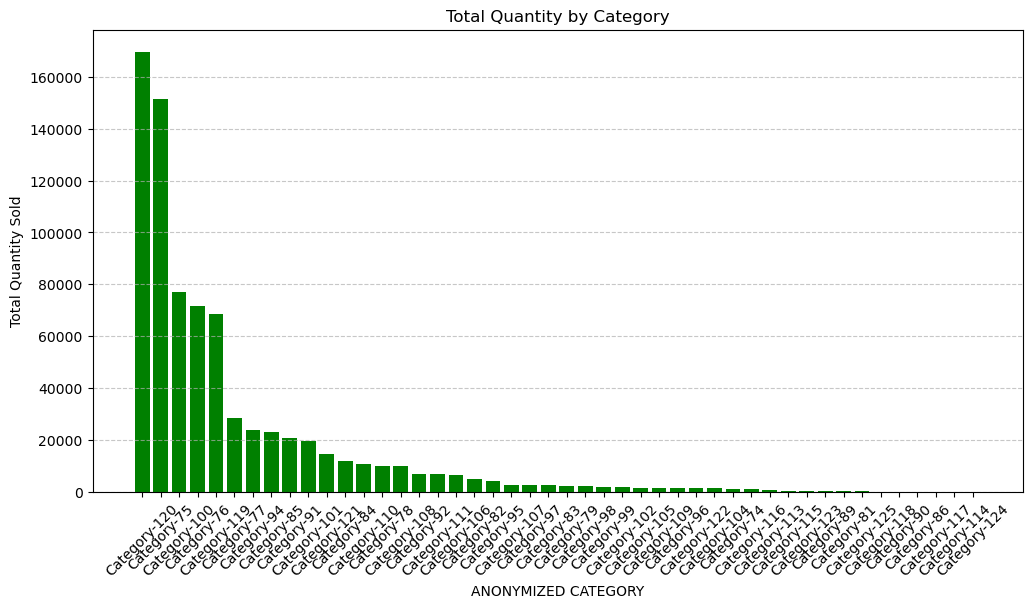

In [104]:
#This is to create a bar chart of the values QUANTITY AND CATEGORY.
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_Category['ANONYMIZED CATEGORY'], grouped_data_Category['TOTAL_QUANTITY'], color='green')
plt.xlabel("ANONYMIZED CATEGORY")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity by Category")
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [105]:
#VALUE
#This regroups for Value rather than Quantity
grouped_data = grouped_data.sort_values(by='TOTAL_VALUE', ascending=False)
print(grouped_data.head())

   ANONYMIZED CATEGORY  TOTAL_QUANTITY  UNIT_PRICE   TOTAL_VALUE
18        Category-120          169715  590.593528  1.002326e+08
25         Category-75          151330  588.265241  8.902218e+07
0         Category-100           76824  593.872211  4.562364e+07
26         Category-76           71719  588.207872  4.218568e+07
17        Category-119           68332  588.259600  4.019695e+07


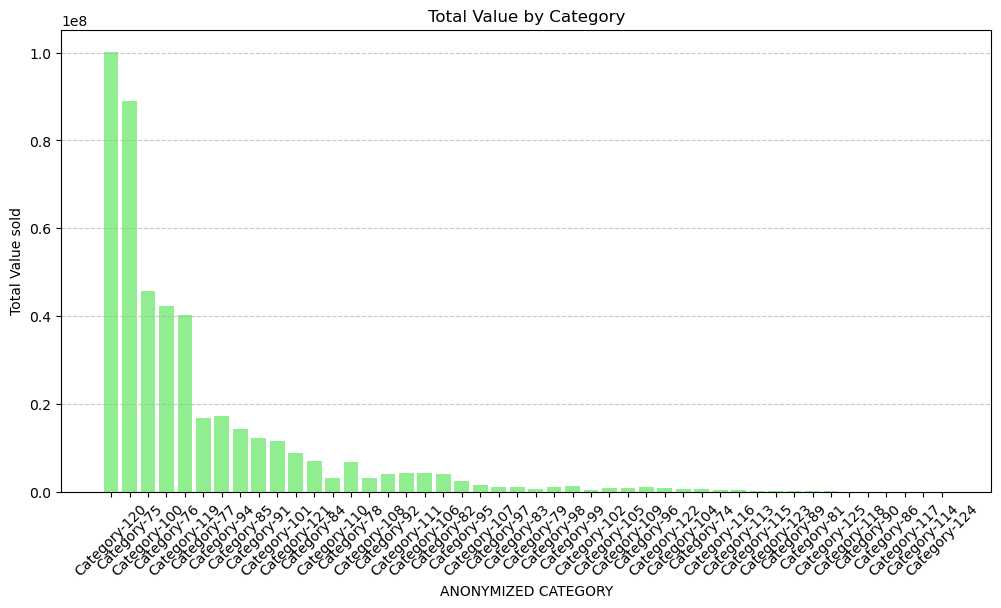

In [106]:
#This is to create a bar chart of the values VALUE AND CATEGORY.
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_Category['ANONYMIZED CATEGORY'], grouped_data_Category['TOTAL_VALUE'], color='lightgreen')
plt.xlabel("ANONYMIZED CATEGORY")
plt.ylabel("Total Value sold")
plt.title("Total Value by Category")
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [107]:
'''
The highest value in terms of Category is Category 120, with a value around 100 Million,
It has both a high value and is quite frequently purchased, a necessity that is high in value,
like beauty and skin care products. The average Value is around 150-170 Million and the average in,
Quantity is about 150,000 -250,000. 
'''

'\nThe highest value in terms of Category is Category 120, with a value around 100 Million,\nIt has both a high value and is quite frequently purchased, a necessity that is high in value,\nlike beauty and skin care products. The average Value is around 150-170 Million and the average in,\nQuantity is about 150,000 -250,000. \n'

Business

In [108]:
# Group by business with total quantity and price average, then create the total value column
grouped_data_business = df_aggregated.groupby(['ANONYMIZED BUSINESS']).agg(TOTAL_QUANTITY=('QUANTITY', 'sum'),UNIT_PRICE=('UNIT PRICE', 'mean')).reset_index()
grouped_data_business['TOTAL_VALUE'] = grouped_data_business['TOTAL_QUANTITY'] * grouped_data_business['UNIT_PRICE']


grouped_data_business = grouped_data_business.sort_values(by='TOTAL_QUANTITY', ascending=False)
print(grouped_data_business.head())


     ANONYMIZED BUSINESS  TOTAL_QUANTITY  UNIT_PRICE   TOTAL_VALUE
2906       Business-978e           13991  596.607761  8.347139e+06
1873       Business-6068            8214  588.435118  4.833406e+06
4781       Business-fe7d            6743  587.081384  3.958690e+06
2353       Business-7a03            6318  606.622194  3.832639e+06
144        Business-07de            6065  591.465685  3.587239e+06


In [109]:
#The number of businesses is very large and it will distort the graph so I have restricted the output to 2000.
grouped_data_business = grouped_data_business[grouped_data_business['TOTAL_QUANTITY'] >= 2000]

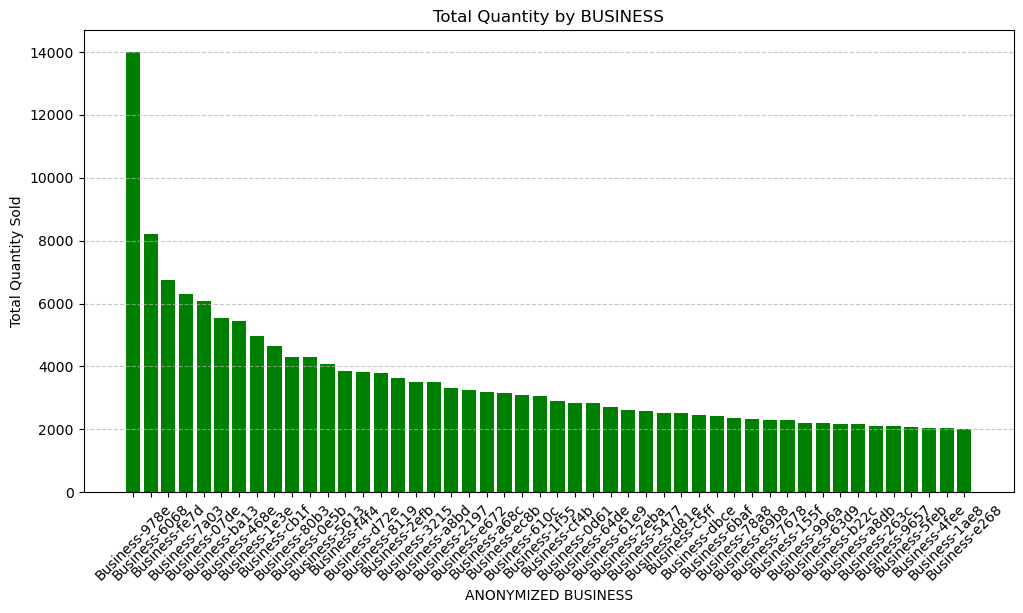

In [110]:

#This is to create a bar chart of the values QUANTITY AND BUSINESS.
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_business['ANONYMIZED BUSINESS'], grouped_data_business['TOTAL_QUANTITY'], color='green')
plt.xlabel("ANONYMIZED BUSINESS")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity by BUSINESS")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [111]:
#VALUE
#This regroups for Value rather than Quantity.
grouped_data_business = grouped_data_business.sort_values(by='TOTAL_VALUE', ascending=False)
print(grouped_data_business.head())

     ANONYMIZED BUSINESS  TOTAL_QUANTITY  UNIT_PRICE   TOTAL_VALUE
2906       Business-978e           13991  596.607761  8.347139e+06
1873       Business-6068            8214  588.435118  4.833406e+06
4781       Business-fe7d            6743  587.081384  3.958690e+06
2353       Business-7a03            6318  606.622194  3.832639e+06
144        Business-07de            6065  591.465685  3.587239e+06


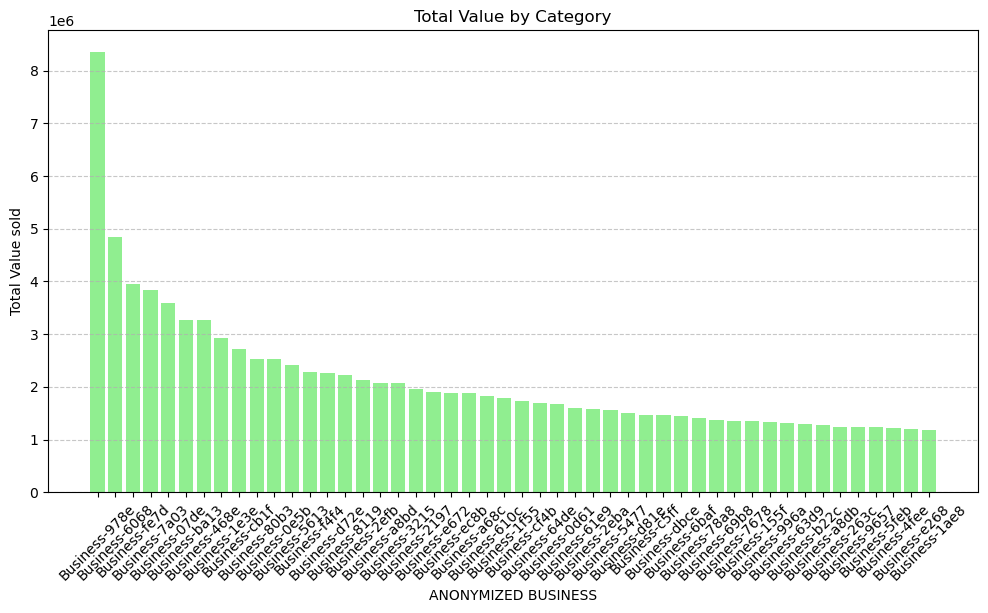

In [112]:
#This is to create a bar chart of the values VALUE AND BUSINESS.
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_business['ANONYMIZED BUSINESS'], grouped_data_business['TOTAL_VALUE'], color='lightgreen')
plt.xlabel("ANONYMIZED BUSINESS")
plt.ylabel("Total Value sold")
plt.title("Total Value by Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [113]:
df_aggregated['TOTAL_VALUE'] = df_aggregated['QUANTITY'] * df_aggregated['UNIT PRICE']

Trends Over Time

In [114]:
sales_trends = df_aggregated.groupby('Month-Year').agg(TOTAL_QUANTITY=('QUANTITY', 'sum'),TOTAL_VALUE=('TOTAL_VALUE', 'sum')).reset_index()
df_aggregated

,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,TOTAL_VALUE
DATE,,,,,,,,
2024-04-01 22:07:00,Category-121,Product-afb7,Business-610c,Location-3e32,4,588.2596,April-2024,2353.0384
2024-04-01 22:07:00,Category-75,Product-8f75,Business-218a,Location-689f,1,588.2596,April-2024,588.2596
2024-04-01 22:23:00,Category-113,Product-4961,Business-719c,Location-e2f8,1,560.0000,April-2024,560.0000
2024-04-01 22:23:00,Category-113,Product-5f20,Business-719c,Location-e2f8,2,560.0000,April-2024,1120.0000
2024-04-01 22:23:00,Category-77,Product-d09c,Business-719c,Location-e2f8,1,588.2596,April-2024,588.2596
...,...,...,...,...,...,...,...,...
2024-09-09 21:54:00,Category-76,Product-6e9c,Business-5525,Location-f37d,2,588.2596,September-2024,1176.5192
2024-09-09 21:56:00,Category-120,Product-3050,Business-c774,Location-689f,2,588.2596,September-2024,1176.5192
2024-09-09 21:59:00,Category-119,Product-e98d,Business-fbcd,Location-7f37,1,588.2596,September-2024,588.2596


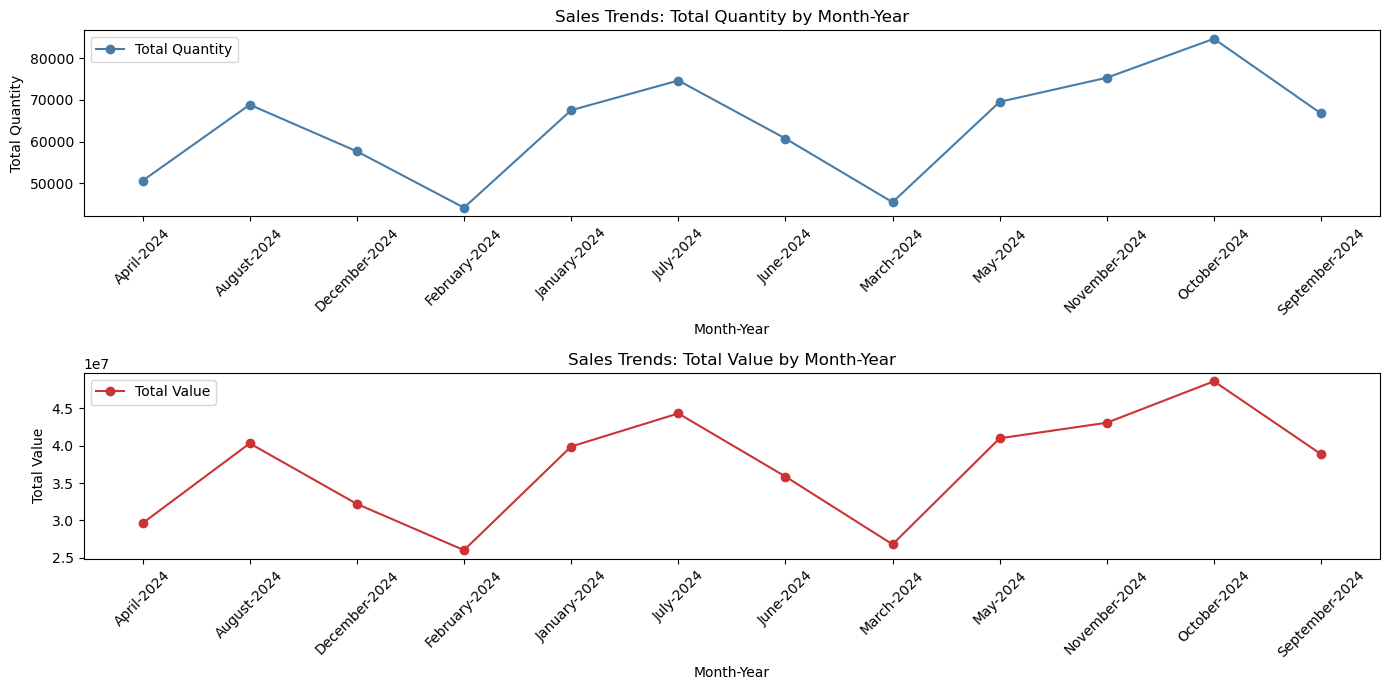

In [115]:
# To quickly compare the two we can look at their trend according to date side to side.
plt.figure(figsize=(14, 7))

# Plot Total Quantity
plt.subplot(2, 1, 1)
plt.plot(sales_trends['Month-Year'].astype(str), sales_trends['TOTAL_QUANTITY'], marker='o', color='#477CA8', label='Total Quantity')
plt.title('Sales Trends: Total Quantity by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.legend()

# Plot Total Value
plt.subplot(2, 1, 2)
plt.plot(sales_trends['Month-Year'].astype(str), sales_trends['TOTAL_VALUE'], marker='o', color='#CB3335', label='Total Value')
plt.title('Sales Trends: Total Value by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [116]:
'''
This shows that Quanity and Value relativly flow together when quanitity increases so does the overall value.
'''

'\nThis shows that Quanity and Value relativly flow together when quanitity increases so does the overall value.\n'

Performance Analysis

In [117]:
#To get the To 5 products I need to add the total value column to the main Cleaned Dataset.
df_aggregated['TOTAL_VALUE'] = df_aggregated['QUANTITY'] * df_aggregated['UNIT PRICE']
df_aggregated

,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,TOTAL_VALUE
DATE,,,,,,,,
2024-04-01 22:07:00,Category-121,Product-afb7,Business-610c,Location-3e32,4,588.2596,April-2024,2353.0384
2024-04-01 22:07:00,Category-75,Product-8f75,Business-218a,Location-689f,1,588.2596,April-2024,588.2596
2024-04-01 22:23:00,Category-113,Product-4961,Business-719c,Location-e2f8,1,560.0000,April-2024,560.0000
2024-04-01 22:23:00,Category-113,Product-5f20,Business-719c,Location-e2f8,2,560.0000,April-2024,1120.0000
2024-04-01 22:23:00,Category-77,Product-d09c,Business-719c,Location-e2f8,1,588.2596,April-2024,588.2596
...,...,...,...,...,...,...,...,...
2024-09-09 21:54:00,Category-76,Product-6e9c,Business-5525,Location-f37d,2,588.2596,September-2024,1176.5192
2024-09-09 21:56:00,Category-120,Product-3050,Business-c774,Location-689f,2,588.2596,September-2024,1176.5192
2024-09-09 21:59:00,Category-119,Product-e98d,Business-fbcd,Location-7f37,1,588.2596,September-2024,588.2596


In [118]:
# Then I group by product as that is what they analysis is based on.
products = df_aggregated.groupby('ANONYMIZED PRODUCT')[['QUANTITY', 'TOTAL_VALUE']].sum().reset_index()
#I then Further group the rows by QUANTITY and get the top 5 with head
top_product_quantity = products.sort_values(by='QUANTITY', ascending=False).head(5)

In [119]:
#I then also further group by VALUE and get the top 5 with head
top_product_value = products.sort_values(by='TOTAL_VALUE', ascending=False).head(5)

C:\Users\MichelleChekwooti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MichelleChekwooti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


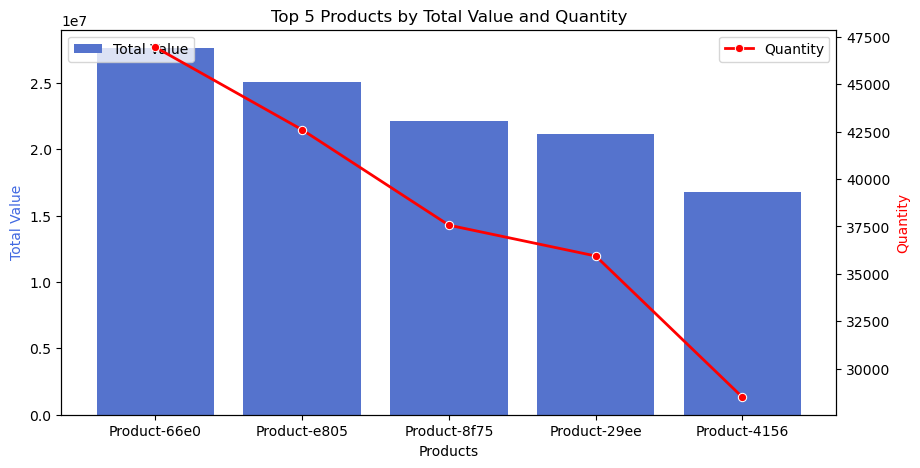

In [120]:
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x='ANONYMIZED PRODUCT', y='TOTAL_VALUE', data=top_product_value, ax=ax1, color='royalblue', label='Total Value')
ax2 = ax1.twinx()
sns.lineplot(x='ANONYMIZED PRODUCT', y='QUANTITY', data=top_product_value, ax=ax2, color='red', marker='o', linewidth=2, label='Quantity')

ax1.set_xlabel('Products')
ax1.set_ylabel('Total Value', color='royalblue')
ax2.set_ylabel('Quantity', color='red')
plt.title('Top 5 Products by Total Value and Quantity')
plt.xticks(rotation=45)

ax1.legend(loc='upper left')# legend
ax2.legend(loc='upper right')

plt.show()

In [121]:
'''
The top 5 products in value and quanity is are 66e0, 3805,8f75,29ee,4156
'''

'\nThe top 5 products in value and quanity is are 66e0, 3805,8f75,29ee,4156\n'

# Section 3: Advanced Analysis

Segmentation of businesses (Anonymized Business) based on Quantity 

In [122]:
#Total Quantity purchased
#I first get the businesses by grouping by value and quantity.
grouped_data_business_v2 = df_aggregated.groupby(['ANONYMIZED BUSINESS']).agg(TOTAL_QUANTITY=('QUANTITY', 'sum'),TOTAL_VALUE=('TOTAL_VALUE', 'sum')).reset_index()
print(grouped_data_business_v2.head())

  ANONYMIZED BUSINESS  TOTAL_QUANTITY   TOTAL_VALUE
0       Business-0000               8   3894.557600
1       Business-0005               1    588.259600
2       Business-0029              26  15294.749601
3       Business-003d              98  44332.537602
4       Business-0072             127  68716.364003


In [123]:
#To segment I create a rule that segments by TOTAL QUANTITY.

def segment_quantity(row):
    if row['TOTAL_QUANTITY'] < 100: # less than 100 sold then its low quantity
        return 'Low Quantity'
    elif 500 <= row['TOTAL_QUANTITY'] < 10000: # more than 500 but less than 9,999 
        return 'Medium Quantity'
    else:
        return 'High Quantity' # more than than 9,999 is high quantity

# I then use apply to put the function onto every row
grouped_data_business_v2['Quantity_Segment'] = grouped_data_business_v2.apply(segment_quantity, axis=1)
grouped_data_business_v2

,ANONYMIZED BUSINESS,TOTAL_QUANTITY,TOTAL_VALUE,Quantity_Segment
0,Business-0000,8,3894.557600,Low Quantity
1,Business-0005,1,588.259600,Low Quantity
2,Business-0029,26,15294.749601,Low Quantity
3,Business-003d,98,44332.537602,Low Quantity
4,Business-0072,127,68716.364003,High Quantity
...,...,...,...,...
4795,Business-ffa9,3,1996.519200,Low Quantity
4796,Business-ffae,6,3633.038400,Low Quantity
4797,Business-ffb1,266,146228.190404,High Quantity
4798,Business-ffd2,37,20601.230401,Low Quantity


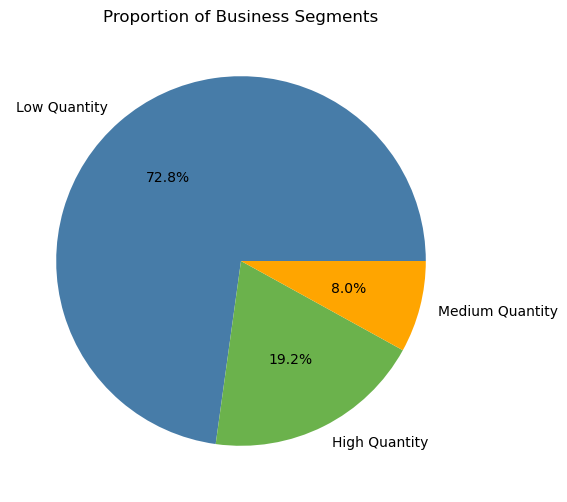

In [124]:
#To understand the new segments easily I use a piechart 
plt.figure(figsize=(6,6))
grouped_data_business_v2['Quantity_Segment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#477CA8', '#6BB24C', '#FFA500'] )

plt.title('Proportion of Business Segments')
plt.ylabel('')
plt.show()

In [125]:
'''
This shows a large number are below 100 in quantity and therefore are low, however they are,
more high qunitity than medium Quantity . more businesses that have more than 9999 sales than between.
Showing a gap in purchasing.
'''

'\nThis shows a large number are below 100 in quantity and therefore are low, however they are,\nmore high qunitity than medium Quantity . more businesses that have more than 9999 sales than between.\nShowing a gap in purchasing.\n'

Segmentation of businesses (Anonymized Business) based on Total Value

In [126]:
print(grouped_data_business_v2.columns)

Index(['ANONYMIZED BUSINESS', 'TOTAL_QUANTITY', 'TOTAL_VALUE',
       'Quantity_Segment'],
      dtype='object')


In [127]:
#To segment I create another rule that segments by TOTAL VALUE.
#I assume that a business with more value than 10,000 is medium and higher than 50000 is high
def segment_value(row):
    if row['TOTAL_VALUE'] < 10000:
        return 'Low Value'
    elif 10000 <= row['TOTAL_VALUE'] < 50000:  # Fixed missing range
        return 'Medium Value'
    else:
        return 'High Value'

# Uses the apply again for each row
grouped_data_business_v2['Value_Segment'] = grouped_data_business_v2.apply(segment_value, axis=1)
grouped_data_business_v2

,ANONYMIZED BUSINESS,TOTAL_QUANTITY,TOTAL_VALUE,Quantity_Segment,Value_Segment
0,Business-0000,8,3894.557600,Low Quantity,Low Value
1,Business-0005,1,588.259600,Low Quantity,Low Value
2,Business-0029,26,15294.749601,Low Quantity,Medium Value
3,Business-003d,98,44332.537602,Low Quantity,Medium Value
4,Business-0072,127,68716.364003,High Quantity,High Value
...,...,...,...,...,...
4795,Business-ffa9,3,1996.519200,Low Quantity,Low Value
4796,Business-ffae,6,3633.038400,Low Quantity,Low Value
4797,Business-ffb1,266,146228.190404,High Quantity,High Value
4798,Business-ffd2,37,20601.230401,Low Quantity,Medium Value


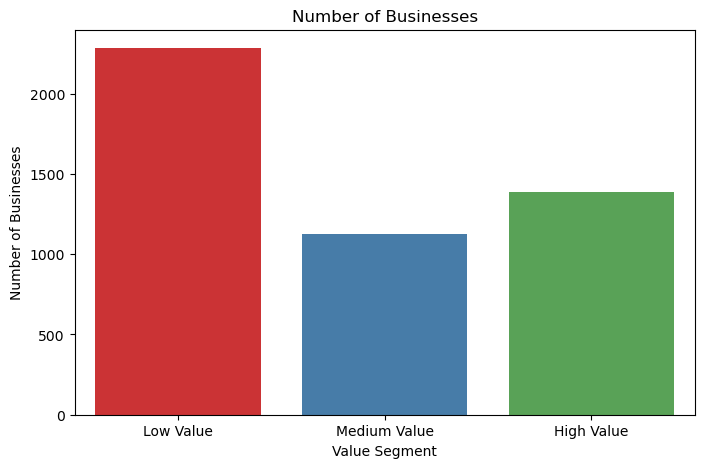

In [128]:
#The new segments are shown by a bar graph to clearly indicate their new categories.
plt.figure(figsize=(8,5))
sns.countplot(data=grouped_data_business_v2, x='Value_Segment', palette='Set1')

plt.xlabel('Value Segment')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses')
plt.show()

In [129]:
'''
They are more Low value businesses than that of high and medium, however there are more high,
than medium. This is similar to Quantity purchased and could mean they are many businesses selling,
low value products sold individually while for high the are less businesses selling higher value products.
'''

'\nThey are more Low value businesses than that of high and medium, however there are more high,\nthan medium. This is similar to Quantity purchased and could mean they are many businesses selling,\nlow value products sold individually while for high the are less businesses selling higher value products.\n'

Frequency of transactions

In [130]:
# The create frequency segmentation of businesses I value counted each business ,
# then turned the value counts into a dataset.
frequency = grouped_data_business_v2['ANONYMIZED BUSINESS'].value_counts().reset_index()
frequency.columns = ['ANONYMIZED BUSINESS', 'Transaction_Frequency']
frequency

,ANONYMIZED BUSINESS,Transaction_Frequency
0,Business-0000,1
1,Business-a939,1
2,Business-a928,1
3,Business-a91e,1
4,Business-a91c,1
...,...,...
4795,Business-523d,1
4796,Business-5233,1
4797,Business-522f,1
4798,Business-5207,1


In [131]:
# To segment the business I assumed that if you have more than 1 transaction you are a medium,
# but if you have more than 3 I think you are High.
def segment_Frequency(row):
    if row['Transaction_Frequency'] <= 1:
        return 'Low'
    elif 3 <= row['Transaction_Frequency'] < 5:
        return 'Medium'
    else:
        return 'High'

# Using apply for each row
frequency['Segment_Frequency'] = frequency.apply(segment_Frequency, axis=1)


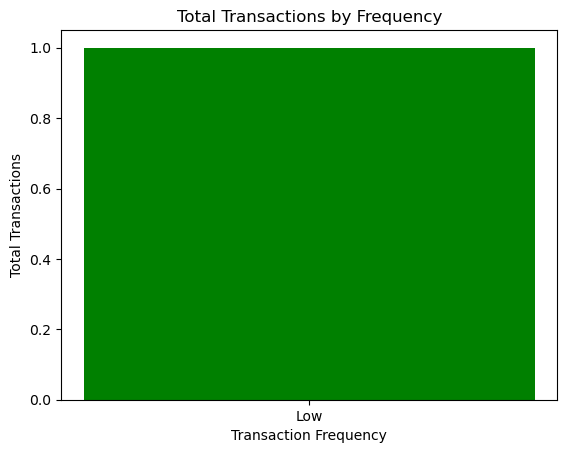

In [135]:
# Create bar chart
plt.bar(frequency['Segment_Frequency'], frequency['Transaction_Frequency'], color='green')
plt.xlabel('Transaction Frequency')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Frequency')
plt.xticks(frequency['Segment_Frequency'].unique())

plt.show()


In [136]:
'''
This shows all transactions happened once.
'''

'\nThis shows all transactions happened once.\n'

High Value, Medium Value, Low Value

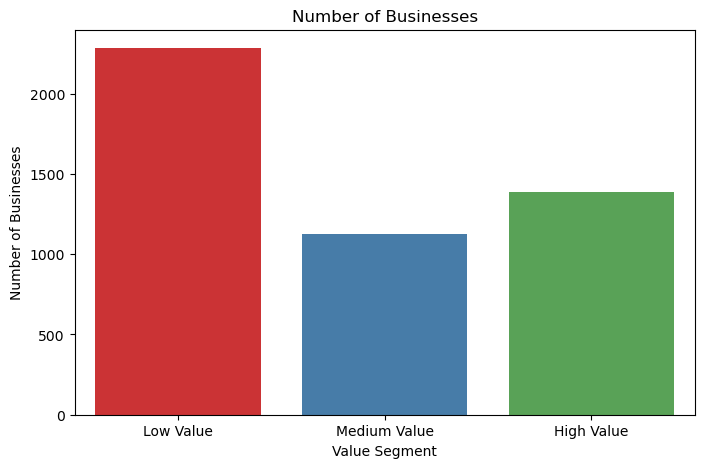

In [137]:
#Using the previous segments are shown by the No of Businesses bar graph. I can classify the 3 groups.
plt.figure(figsize=(8,5))
sns.countplot(data=grouped_data_business_v2, x='Value_Segment', palette='Set1')

plt.xlabel('Value Segment')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses')
plt.show()

In [138]:
'''
Businesses and recommendations,
High Value: For high-value businesses a direct and personalized approach would be beneficial,
These businesses know that their product is either rare or of very high quality and thus priced higher.
They will need longer-term contracts so that you will consistently have their product available.
Focus on loyalty and discuss marketing plans with them ensuring you are representing their brand appropriately,
informing them you are a consistent purchaser, and bringing value to their portfolio.

Medium Value:
These are the least purchased products and are often things that are not necessary but still a bit high in value,
Quality is what will make the difference between them and a lower-value product.
Focus on quality when sourcing from a medium business, inform them of your standards are requirements,
collaborate for large marketing campaigns to improve engagement with their product and awareness.
Pair these products with high-value products. eg Tea with Coffee

Low Value:
Ask these businesses to provide sampling, whether in miniature versions for customers or yourself,
sampling will allow you to gauge the product and its potential.

'''


'\nBusinesses and recommendations,\nHigh Value: For high-value businesses a direct and personalized approach would be beneficial,\nThese businesses know that their product is either rare or of very high quality and thus priced higher.\nThey will need longer-term contracts so that you will consistently have their product available.\nFocus on loyalty and discuss marketing plans with them ensuring you are representing their brand appropriately,\ninforming them you are a consistent purchaser, and bringing value to their portfolio.\n\nMedium Value:\nThese are the least purchased products and are often things that are not necessary but still a bit high in value,\nQuality is what will make the difference between them and a lower-value product.\nFocus on quality when sourcing from a medium business, inform them of your standards are requirements,\ncollaborate for large marketing campaigns to improve engagement with their product and awareness.\nPair these products with high-value products. eg 

Forecasting

C:\Users\MichelleChekwooti\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


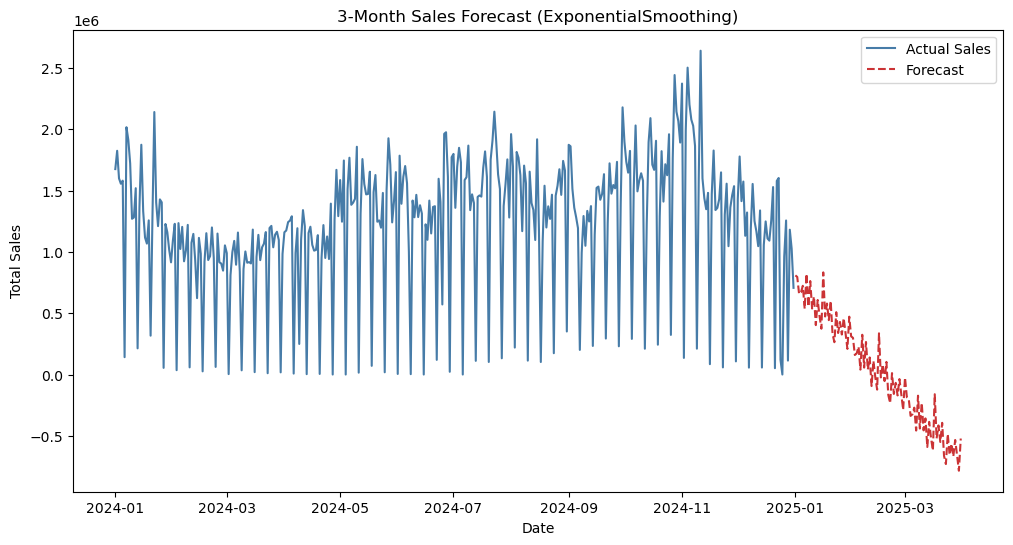

In [139]:
# Importing Stats model and focusing on ExponentialSmoothing
# This is because it is known for being excellent for Timeseries and data with seasonality like sales
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# This check to make sure the date column is in date time
df_aggregated.index = pd.to_datetime(df_aggregated.index)

# This takes a sample preferably a D for daily sample then sums it.
df_daily = df_aggregated.resample('D').sum()

# the model itself 
model = ExponentialSmoothing(
    df_daily['TOTAL_VALUE'],  
    trend='add', # additive means that the data is constant overtime so the trend is constant
    seasonal='add', # The seasonality is constant
    seasonal_periods=30,  # this is how many times the seasonality repeats so it repeats every 100 days
    initialization_method="estimated"
).fit()

# The Forecast for the next 3 months is 90 Days.
forecast = model.forecast(90)

# I put this in a line graph to show the trend and forecast data.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['TOTAL_VALUE'], label='Actual Sales', color='#477CA8')
plt.plot(forecast, label='Forecast', linestyle='dashed', color='#CB3335')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('3-Month Sales Forecast (ExponentialSmoothing)')
plt.legend()
plt.show()

Anomaly Detection

In [140]:
# To get the spikes in sales I create a group of sales (value, quantity) by date
daily_sales = df_aggregated.groupby('DATE').agg({'QUANTITY': 'sum', 'TOTAL_VALUE': 'sum'}).reset_index()

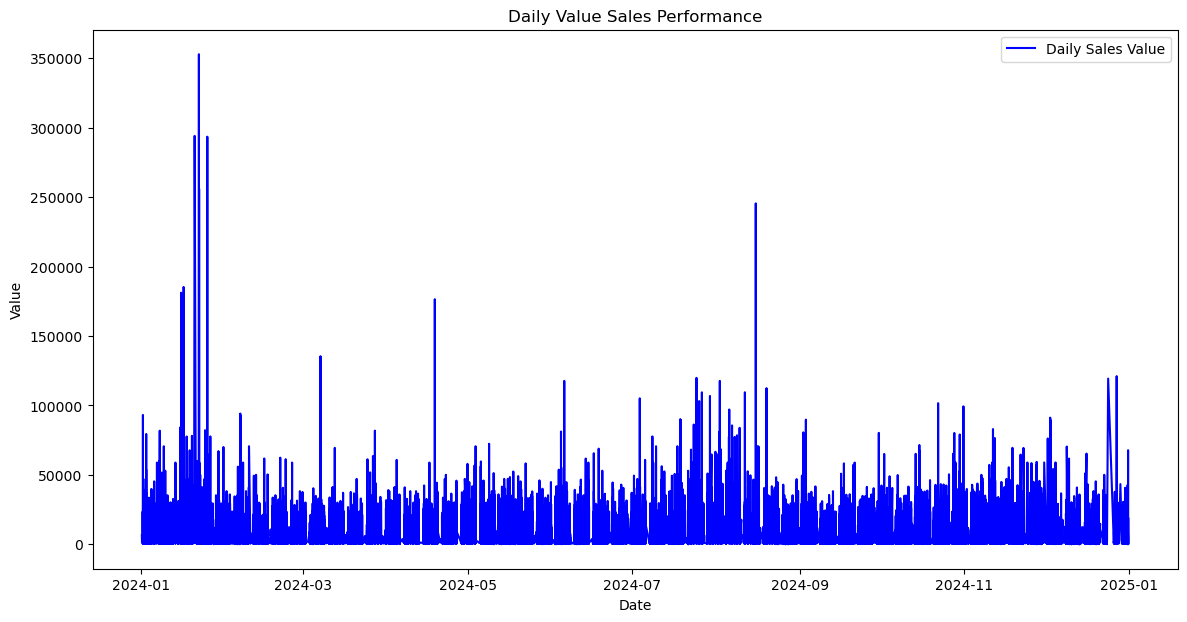

In [141]:
#To see this visually I use a line graph
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['DATE'], daily_sales['TOTAL_VALUE'], label='Daily Sales Value', color='blue')
plt.title('Daily Value Sales Performance')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

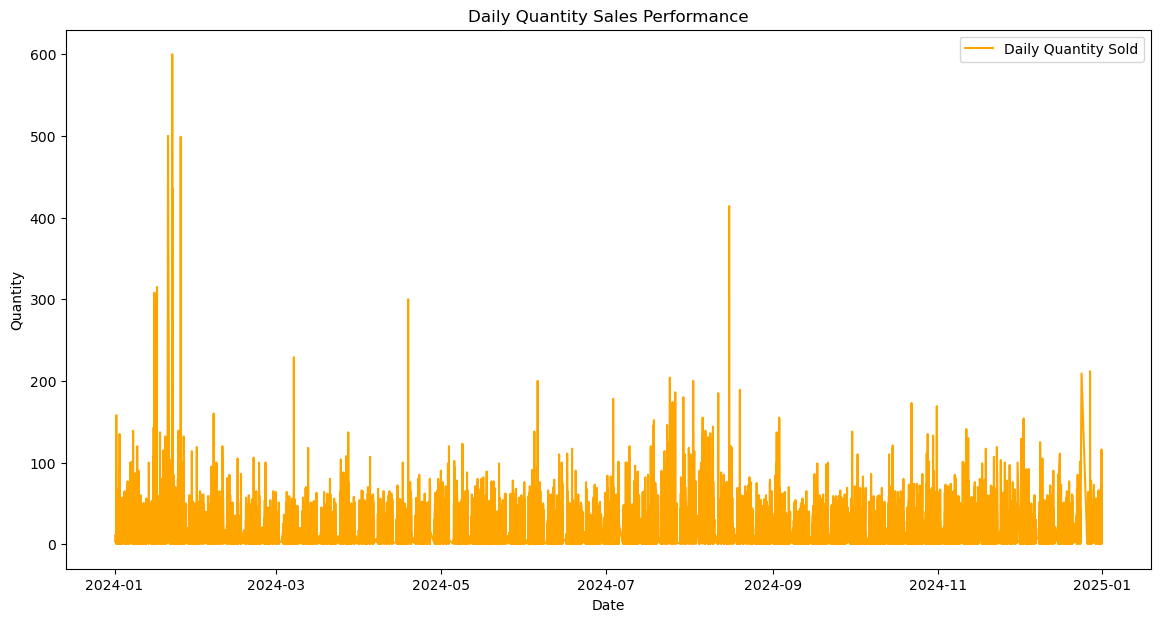

In [142]:
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['DATE'], daily_sales['QUANTITY'], label='Daily Quantity Sold', color='orange')
plt.title('Daily Quantity Sales Performance')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [143]:
# Statistics to determine the average and deviations from the average.
mean_value = daily_sales['TOTAL_VALUE'].mean()
std_value = daily_sales['TOTAL_VALUE'].std()

# The threshold for anomalies is 3 standard deviations
threshold = 3
# I created a table that takes the total value and if it is greater than the upper limit of the mean and lower limit
daily_sales['Anomaly'] = (daily_sales['TOTAL_VALUE'] > mean_value + threshold * std_value) | (daily_sales['TOTAL_VALUE'] < mean_value - threshold * std_value)
anomalies = daily_sales[daily_sales['Anomaly']]

In [144]:

'''
This shows large spikes in January to Feburary 2024 , around April 2024 and August 2024 in Value. This could be realted to,
seasonal marketing and promotions January it could be back to school season or beginning of the year resolutions,
February Valentines day.
'''

'\nThis shows large spikes in January to Feburary 2024 , around April 2024 and August 2024 in Value. This could be realted to,\nseasonal marketing and promotions January it could be back to school season or beginning of the year resolutions,\nFebruary Valentines day.\n'

Correlation Analysis

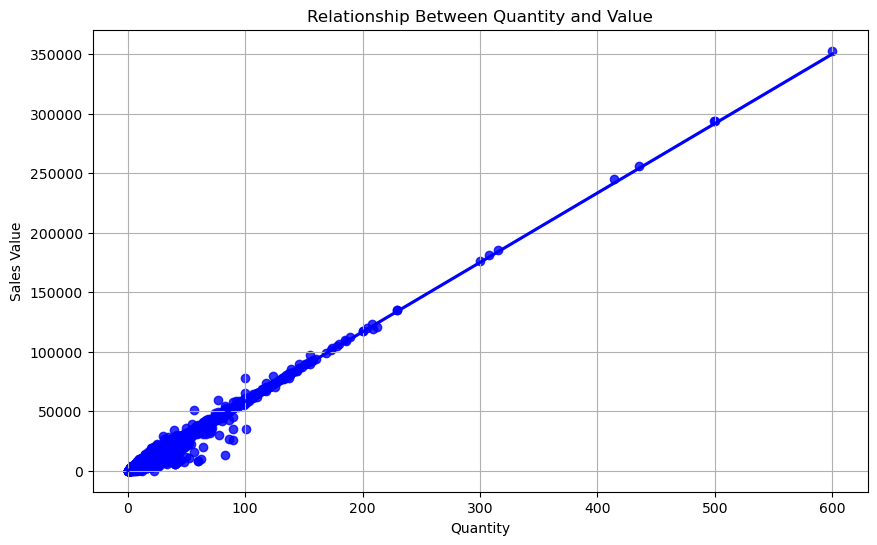

In [145]:
# To calculate correlation/ regresstion to confirm this assumption.
# Uisng a Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='QUANTITY', y='TOTAL_VALUE', data=daily_sales, marker='o', color='blue')
plt.title('Relationship Between Quantity and Value')
plt.xlabel('Quantity')
plt.ylabel('Sales Value')
plt.grid()
plt.show()

In [146]:
'''
This shows a strong positive liner correlation with quantity sold and Value. So as one increases so,
does the other. The blue line represents the trend line and the dots are the data points that show the majority of sales value and quantity is below 50,000 in value and less than 100 in quantity.
'''

'\nThis shows a strong positive liner correlation with quantity sold and Value. So as one increases so,\ndoes the other. The blue line represents the trend line and the dots are the data points that show the majority of sales value and quantity is below 50,000 in value and less than 100 in quantity.\n'

In [147]:
# Correlation by formula to confirm.
correlation = daily_sales['QUANTITY'].corr(daily_sales['TOTAL_VALUE'])
print(f'Correlation between Quantity and Value: {correlation:.2f}')

Correlation between Quantity and Value: 0.99


In [148]:
'''
This shows a very strong Positive Correlation: it suggests that as more units are sold, 
the total sales value increases.
'''

'\nThis shows a very strong Positive Correlation: it suggests that as more units are sold, \nthe total sales value increases.\n'

In [151]:
#Exporting the dataset for Tableau
df_aggregated = df_aggregated.reset_index()

In [152]:
df_aggregated

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,TOTAL_VALUE
0,2024-04-01 22:07:00,Category-121,Product-afb7,Business-610c,Location-3e32,4,588.2596,April-2024,2353.0384
1,2024-04-01 22:07:00,Category-75,Product-8f75,Business-218a,Location-689f,1,588.2596,April-2024,588.2596
2,2024-04-01 22:23:00,Category-113,Product-4961,Business-719c,Location-e2f8,1,560.0000,April-2024,560.0000
3,2024-04-01 22:23:00,Category-113,Product-5f20,Business-719c,Location-e2f8,2,560.0000,April-2024,1120.0000
4,2024-04-01 22:23:00,Category-77,Product-d09c,Business-719c,Location-e2f8,1,588.2596,April-2024,588.2596
...,...,...,...,...,...,...,...,...,...
329876,2024-09-09 21:54:00,Category-76,Product-6e9c,Business-5525,Location-f37d,2,588.2596,September-2024,1176.5192
329877,2024-09-09 21:56:00,Category-120,Product-3050,Business-c774,Location-689f,2,588.2596,September-2024,1176.5192
329878,2024-09-09 21:59:00,Category-119,Product-e98d,Business-fbcd,Location-7f37,1,588.2596,September-2024,588.2596
329879,2024-09-09 21:59:00,Category-120,Product-29ee,Business-fbcd,Location-7f37,2,588.2596,September-2024,1176.5192


In [153]:
df_aggregated.to_csv('sales_data.csv', index=False)